# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test dataset](#section402)<br>
    - 4.3 [Logistic regression in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
5. [Model evaluation](#section5)<br>

<a id='section1'></a>
### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id='section2'></a>
### 2. Data Loading and Description

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 9 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|                                       
| Fare          | Price of ticket                                           |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Importing the Dataset

In [2]:
import os
data = pd.read_csv('/kaggle/input/titanic_data.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708


In [4]:
data.shape

(891, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


<a id='section3'></a>
## 3. Preprocessing the data

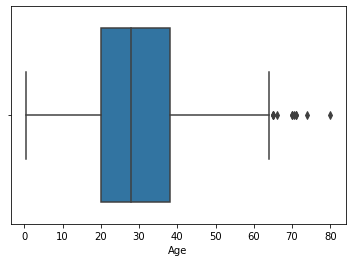

In [6]:
sns.boxplot(data['Age']);

In [7]:
(20+22+20+24+80)/5

33.2

In [8]:
20,20,22,24,80

(20, 20, 22, 24, 80)

- Dealing with missing values<br/>
    - Replacing missing values of __Age__ with median values.

In [9]:
data.Age.median()

28.0

In [10]:
data['Age'].fillna(data.Age.median(),inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [13]:
data['family_size'] = data['SibSp']+data['Parch']+1

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [15]:
cols_to_remove = ['PassengerId','Name','SibSp','Parch','Fare']
data.drop(cols_to_remove, axis=1, inplace=True)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,family_size
0,0,3,male,22.0,2
1,1,1,female,38.0,2
2,1,3,female,26.0,1
3,1,1,female,35.0,2
4,0,3,male,35.0,1


In [17]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
data_with_dummies = pd.get_dummies(data, columns=['Sex'],drop_first=True)

In [19]:
data_with_dummies.head()

,Survived,Pclass,Age,family_size,Sex_male
0,0,3,22.0,2,1
1,1,1,38.0,2,0
2,1,3,26.0,1,0
3,1,1,35.0,2,0
4,0,3,35.0,1,1


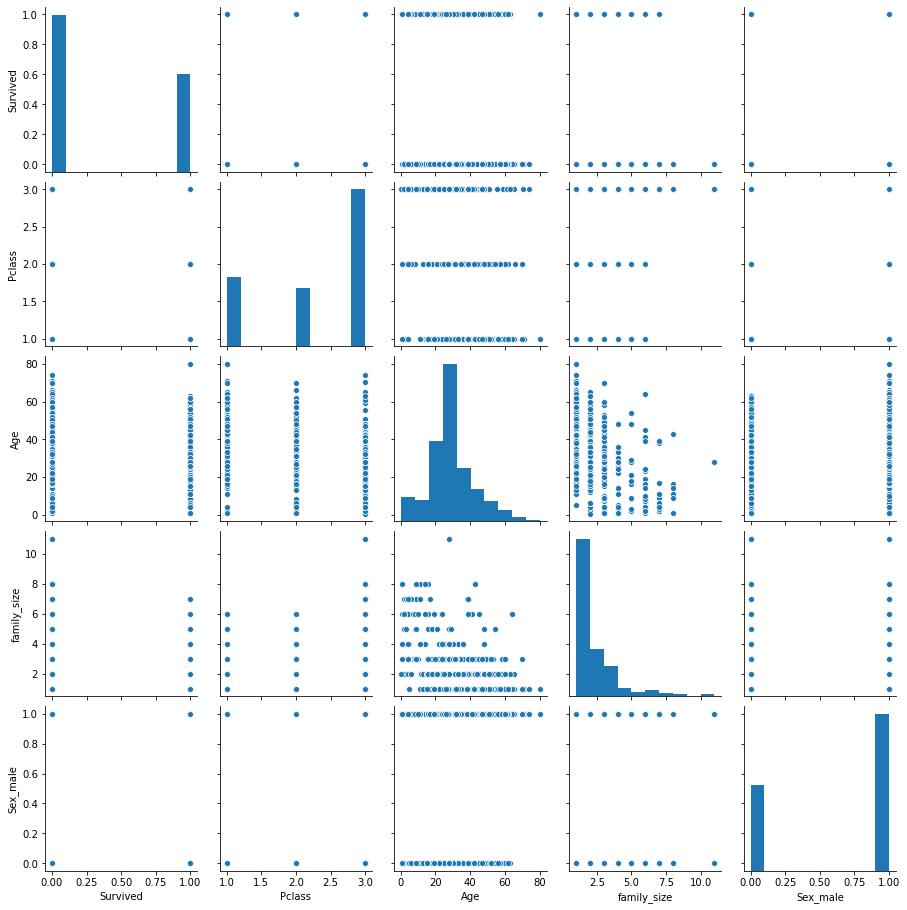

In [20]:
sns.pairplot(data_with_dummies);

<a id='section4'></a>
## 4. Logistic Regression

<a id='section401'></a>
## 4.1 Preparing X and y using pandas

In [21]:
data_with_dummies.head()

,Survived,Pclass,Age,family_size,Sex_male
0,0,3,22.0,2,1
1,1,1,38.0,2,0
2,1,3,26.0,1,0
3,1,1,35.0,2,0
4,0,3,35.0,1,1


In [22]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'family_size', 'Sex_male'], dtype='object')

In [23]:
features = ['Pclass', 'Age', 'family_size', 'Sex_male']
target = ['Survived']

In [24]:
x = data_with_dummies[features]
y = data_with_dummies[target]

In [25]:
x.head()

,Pclass,Age,family_size,Sex_male
0,3,22.0,2,1
1,1,38.0,2,0
2,3,26.0,1,0
3,1,35.0,2,0
4,3,35.0,1,1


In [26]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<a id='section402'></a>
## 4.2 Splitting X and y into training and test datasets.

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=96)

In [28]:
print('x-train shape', x_train.shape)
print('x-test shape', x_test.shape)
print('y-train shape', y_train.shape)
print('y-test shape', y_test.shape)

x-train shape (712, 4)
x-test shape (179, 4)
y-train shape (712, 1)
y-test shape (179, 1)


<a id='section403'></a>
## 4.3 Logistic regression in scikit-learn

In [29]:
from sklearn.linear_model import LogisticRegression

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluation of the model

In [30]:
log_reg = LogisticRegression()

In [31]:
log_reg.fit(x_train, y_train)

LogisticRegression()

<a id='section404'></a>
## 4.4 Using the Model for Prediction

In [32]:
y_pred = log_reg.predict(x_test)

In [33]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [34]:
log_reg.predict_proba(x_test)[:,1]

array([0.8920241 , 0.44959554, 0.30348008, 0.4826417 , 0.10683599,
       0.05278357, 0.10526178, 0.06741827, 0.10683599, 0.28910487,
       0.06453995, 0.05278357, 0.10683599, 0.38441256, 0.06775863,
       0.23216953, 0.14290538, 0.20933392, 0.09480577, 0.26307513,
       0.345982  , 0.09176846, 0.15123549, 0.36116157, 0.08881891,
       0.13888563, 0.94287084, 0.30348008, 0.6277379 , 0.54889986,
       0.85999151, 0.10683599, 0.08659383, 0.12374648, 0.10683599,
       0.29831637, 0.12019008, 0.13858296, 0.12711157, 0.90977173,
       0.56528727, 0.84321884, 0.10683599, 0.21723904, 0.05620487,
       0.77158004, 0.75966296, 0.07664736, 0.46608141, 0.14670423,
       0.52412968, 0.81463439, 0.92915876, 0.10683599, 0.54889986,
       0.09480577, 0.50754238, 0.06368148, 0.10683599, 0.11963776,
       0.17344272, 0.08596834, 0.12345396, 0.12739289, 0.10370807,
       0.33479592, 0.11279998, 0.10683599, 0.05968219, 0.07863887,
       0.23216953, 0.66504956, 0.22630185, 0.79824725, 0.40893

In [35]:
y_pred.sum()

59

<a id='section5'></a>
## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score__ and __confusion matrix__ for evaluation.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
confusion_matrix(y_test, y_pred)

array([[105,  18],
       [ 15,  41]])

In [38]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,105,18
1,15,41


In [40]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['predicted_not_survived','predicted_survived'], index=['actual_not_survived','actual_survived'])

,predicted_not_survived,predicted_survived
actual_not_survived,105,18
actual_survived,15,41


In [41]:
(105+41)/(105+18+15+41)

0.8156424581005587

In [42]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [43]:
41/(41+18)

0.6949152542372882

100

90 negative
10 positive

90%
0%

In [44]:
pd.DataFrame([[90,10],[0,0]], columns=['predicted_negative','predicted_positive'], index=['actual_negative','actual_positive'])

,predicted_negative,predicted_positive
actual_negative,90,10
actual_positive,0,0


classwise 

100% accurate for negative cases ::
0% accurate for positive cases